In [1]:
import numpy as np
import pandas as pd
import pickle
from pprint import pprint

# Gensim
import gensim
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /home/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [4]:
def read_data():
    western_df = pd.read_pickle('western_df_english_cleaned_final.pkl')
    non_western_df = pd.read_pickle('non_western_df_english_cleaned_final.pkl')
    western_df['type'] = 'western'
    non_western_df['type'] = 'non western'
    return pd.concat([western_df, non_western_df]).reset_index()

In [5]:
data = read_data()

In [6]:
data.shape

(3703201, 21)

In [7]:
data.head()

,index,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,...,first_review,last_review,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type
0,0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2010-08-18,2020-02-22,97.0,0.999997,en,My girlfriend and I hadn t known Alina before ...,My girlfriend and I hadn t known Alina before ...,153,2010,western
1,1,13913,2011-07-11,Alina was a really good host. The flat is clea...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2010-08-18,2020-02-22,97.0,0.999997,en,Alina was a really good host The flat is clean...,Alina was a really good host. The flat is clea...,31,2011,western
2,2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2010-08-18,2020-02-22,97.0,0.999995,en,Alina is an amazing host She made me feel righ...,Alina is an amazing host. She made me feel rig...,70,2011,western
3,3,13913,2011-10-03,"Alina's place is so nice, the room is big and ...",54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2010-08-18,2020-02-22,97.0,0.999997,en,Alina s place is so nice the room is big and c...,Alina s place is so nice the room is big and c...,87,2011,western
4,4,13913,2011-10-09,"Nice location in Islington area, good for shor...",54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2010-08-18,2020-02-22,97.0,0.999998,en,Nice location in Islington area good for short...,Nice location in Islington area good for short...,17,2011,western


In [8]:
data['comment_to_sentences'] = data.comments_cleaned_sentiment.apply(lambda comment: sent_tokenize(comment))

In [9]:
print('The average number of words in a document is: {}'.format(round(data.num_words.mean())))
print('The minimum number of words in a document is: {}'.format(min(data.num_words)))
print('The maximum number of words in a document is: {}'.format(max(data.num_words)))

The average number of words in a document is: 49
The minimum number of words in a document is: 7
The maximum number of words in a document is: 263


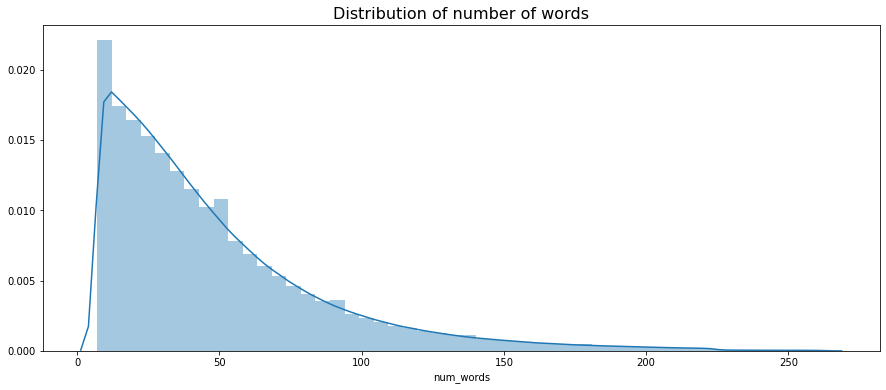

In [10]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title('Distribution of number of words', fontsize=16)
ax.set_xlabel('Number of words')
sns.distplot(data.num_words, bins=50, ax=ax);

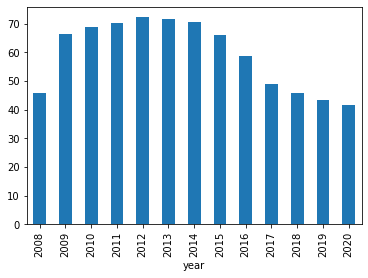

In [11]:
data.groupby(['year'])['num_words'].mean().plot(kind='bar');

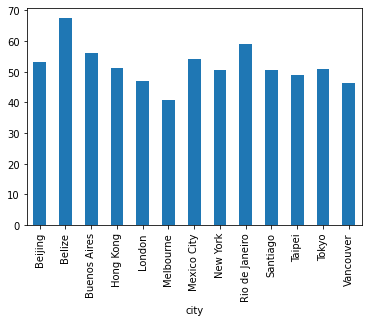

In [12]:
data.groupby(['city'])['num_words'].mean().plot(kind='bar');

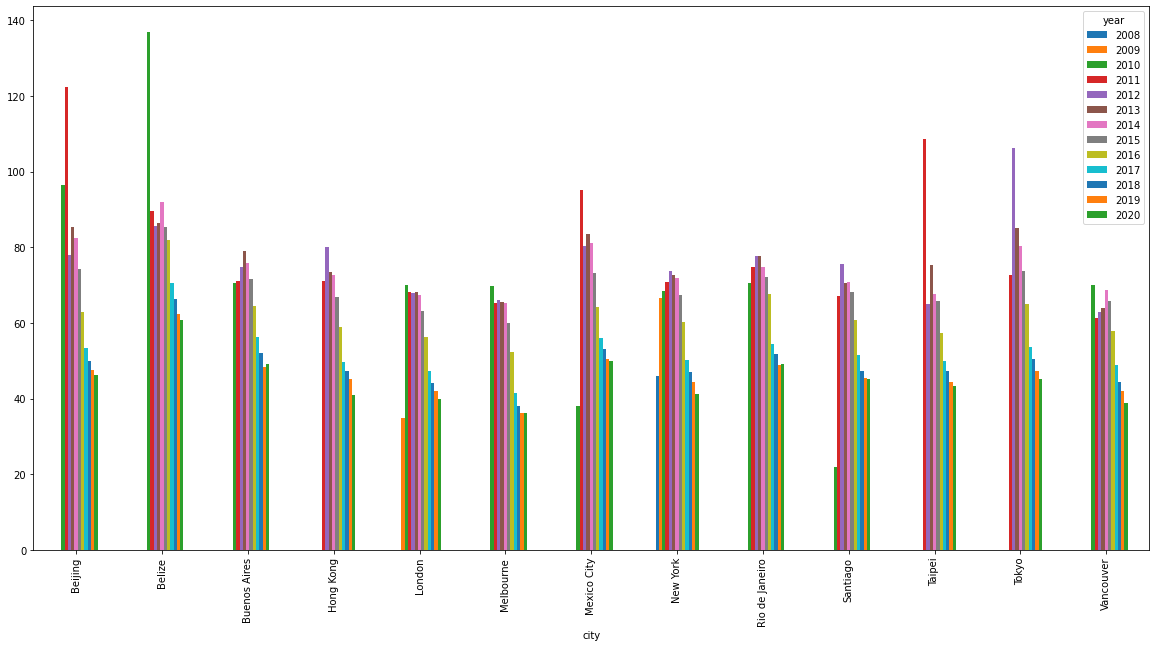

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax = data.groupby(['city', 'year'])['num_words'].mean().reset_index().pivot('city', 'year', 'num_words').plot(kind='bar', ax=ax);

In [14]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [36]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [37]:
data.head()

,index,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,...,last_review,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type,comment_to_sentences
0,0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2020-02-22,97.0,0.999997,en,My girlfriend and I hadn t known Alina before ...,My girlfriend and I hadn t known Alina before ...,153,2010,western,[My girlfriend and I hadn t known Alina before...
1,1,13913,2011-07-11,Alina was a really good host. The flat is clea...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2020-02-22,97.0,0.999997,en,Alina was a really good host The flat is clean...,Alina was a really good host. The flat is clea...,31,2011,western,"[Alina was a really good host., The flat is cl..."
2,2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...,54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2020-02-22,97.0,0.999995,en,Alina is an amazing host She made me feel righ...,Alina is an amazing host. She made me feel rig...,70,2011,western,"[Alina is an amazing host., She made me feel r..."
3,3,13913,2011-10-03,"Alina's place is so nice, the room is big and ...",54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2020-02-22,97.0,0.999997,en,Alina s place is so nice the room is big and c...,Alina s place is so nice the room is big and c...,87,2011,western,[Alina s place is so nice the room is big and ...
4,4,13913,2011-10-09,"Nice location in Islington area, good for shor...",54730,2009-11-16,Islington,London,51.56802,-0.11121,...,2020-02-22,97.0,0.999998,en,Nice location in Islington area good for short...,Nice location in Islington area good for short...,17,2011,western,[Nice location in Islington area good for shor...


In [38]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [39]:
data = stratified_sample_df(data, 'city', 10000)
print(data.shape)
data.head()

(130000, 22)


,index,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,...,last_review,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type,comment_to_sentences
2780767,13213,9142891,2016-03-27,"Firstly, the house is exactly the same as desc...",13604427,2014-03-27,丰台区 / Fengtai,Beijing,39.86782,116.42383,...,2020-01-21,96.0,0.999997,en,Firstly the house is exactly the same as descr...,Firstly the house is exactly the same as descr...,74,2016,non western,[Firstly the house is exactly the same as desc...
2779381,7049,6981222,2016-06-28,Janey was a lovely lady and always keen to hel...,30899625,2015-04-09,朝阳区 / Chaoyang,Beijing,39.91975,116.54748,...,2019-03-19,99.0,0.999997,en,Janey was a lovely lady and always keen to hel...,Janey was a lovely lady and always keen to hel...,230,2016,non western,[Janey was a lovely lady and always keen to he...
2792104,122157,26697080,2019-10-04,Convenient to most of the attractions. Place w...,12475232,2014-02-22,朝阳区 / Chaoyang,Beijing,39.93873,116.45242,...,2020-01-14,98.0,0.999997,en,Convenient to most of the attractions Place wa...,Convenient to most of the attractions. Place w...,23,2019,non western,"[Convenient to most of the attractions., Place..."
2794794,168712,31158613,2019-05-13,The room was just as advertised. Good value fo...,221673246,2018-10-20,丰台区 / Fengtai,Beijing,39.83609,116.37184,...,2019-07-13,89.0,0.999998,en,The room was just as advertised Good value for...,The room was just as advertised. Good value fo...,11,2019,non western,"[The room was just as advertised., Good value ..."
2781365,16556,11325456,2018-12-24,Yongtao’s place is like a paradise with great...,59251754,2016-02-17,朝阳区 / Chaoyang,Beijing,39.93271,116.50092,...,2020-01-18,99.0,0.999994,en,Yongtaos place is like a paradise with great m...,Yongtaos place is like a paradise with great m...,23,2018,non western,[Yongtaos place is like a paradise with great ...


In [40]:
content = data.comment_to_sentences.values.tolist()

In [105]:
len(content)

130000

In [41]:
pprint(content[:10])

[['Firstly the house is exactly the same as described it is beautifully '
  'decorated and the room is well equipped with comfortable pillow and quilt '
  'an independent bathroom and air conditioning.',
  'In terms of location the house is easy to find as long as you follow the '
  'guideline uploaded in the profile.',
  'The house is close to the MTR station nevertheless it is kind of far away '
  'from main shopping points and places of interests.'],
 ['Janey was a lovely lady and always keen to help travellers like me with '
  'everything.',
  'Since the day I booked my holidays from Australia which was months before I '
  'got to Beijing Janey was in contact and pretty much answered all my queries '
  'about Beijing before I even got there.',
  'She had also arranged me a pick up and drop off cab to and from airport to '
  'the apartment which was great.',
  'Her place was cosy and it felt very homely with free fast wifi connection.',
  'During my entire stay she helped me with di

In [42]:
with open('content.pkl', 'wb') as f:
    pickle.dump(content, f)

In [5]:
with open('content.pkl', 'rb') as f:
    content = pickle.load(f)

In [44]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

def freq_words(content):
    all_words = [word for text in content for sentence in text for word in word_tokenize(sentence.lower())]
    freq_dist = FreqDist(all_words)
    return freq_dist

In [45]:
%%time
words_freq = freq_words(content)

CPU times: user 59 s, sys: 3.22 s, total: 1min 2s
Wall time: 1min 2s


In [21]:
with open('words_freq.pkl', 'wb') as f:
    pickle.dump(words_freq, f)

In [46]:
# function to plot most frequent terms
def plot_freq_words(fdist, terms = 20):
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns='count', n = terms) 
    plt.figure(figsize=(20,7))
    plt.tick_params(labelsize=12)
    ax = sns.barplot(data=d, x= 'word', y = 'count')
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xlabel('Word', fontsize=14)
    plt.title('Most frequent words', fontdict=dict(size=20))
    plt.show()

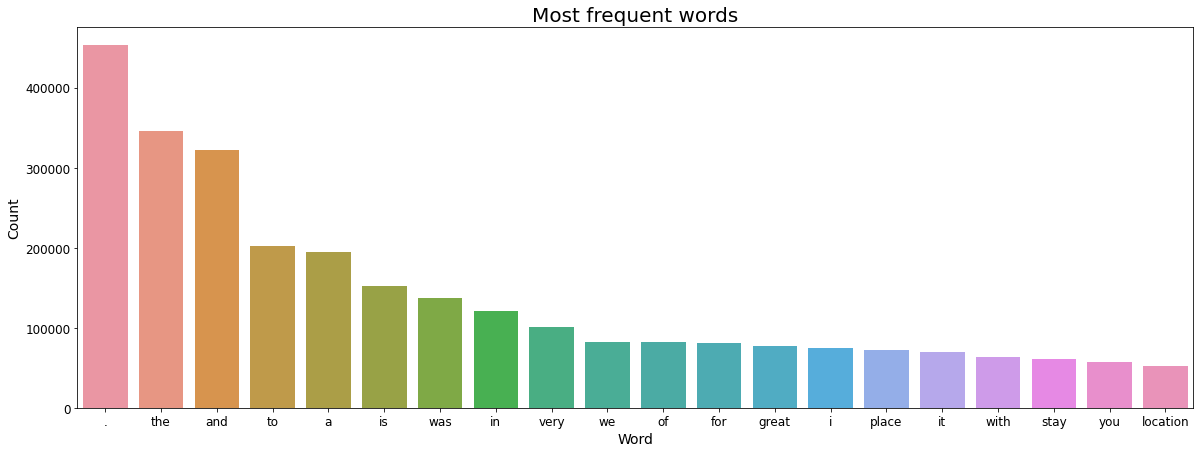

In [47]:
plot_freq_words(words_freq, 20)

In [48]:
def sent_to_words(doc):
    for sentences in doc:
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [50]:
%%time
data_words = list(sent_to_words(content))

print(data_words[:10])

[['firstly', 'the', 'house', 'is', 'exactly', 'the', 'same', 'as', 'described', 'it', 'is', 'beautifully', 'decorated', 'and', 'the', 'room', 'is', 'well', 'equipped', 'with', 'comfortable', 'pillow', 'and', 'quilt', 'an', 'independent', 'bathroom', 'and', 'air', 'conditioning'], ['in', 'terms', 'of', 'location', 'the', 'house', 'is', 'easy', 'to', 'find', 'as', 'long', 'as', 'you', 'follow', 'the', 'guideline', 'uploaded', 'in', 'the', 'profile'], ['the', 'house', 'is', 'close', 'to', 'the', 'mtr', 'station', 'nevertheless', 'it', 'is', 'kind', 'of', 'far', 'away', 'from', 'main', 'shopping', 'points', 'and', 'places', 'of', 'interests'], ['janey', 'was', 'lovely', 'lady', 'and', 'always', 'keen', 'to', 'help', 'travellers', 'like', 'me', 'with', 'everything'], ['since', 'the', 'day', 'booked', 'my', 'holidays', 'from', 'australia', 'which', 'was', 'months', 'before', 'got', 'to', 'beijing', 'janey', 'was', 'in', 'contact', 'and', 'pretty', 'much', 'answered', 'all', 'my', 'queries', 

In [106]:
len(data_words)

509208

In [25]:
with open('data_words.pkl', 'wb') as f:
    pickle.dump(data_words, f)

In [11]:
with open('data_words.pkl', 'rb') as f:
    data_words = pickle.load(f)

In [107]:
data_words

[['firstly',
  'the',
  'house',
  'is',
  'exactly',
  'the',
  'same',
  'as',
  'described',
  'it',
  'is',
  'beautifully',
  'decorated',
  'and',
  'the',
  'room',
  'is',
  'well',
  'equipped',
  'with',
  'comfortable',
  'pillow',
  'and',
  'quilt',
  'an',
  'independent',
  'bathroom',
  'and',
  'air',
  'conditioning'],
 ['in',
  'terms',
  'of',
  'location',
  'the',
  'house',
  'is',
  'easy',
  'to',
  'find',
  'as',
  'long',
  'as',
  'you',
  'follow',
  'the',
  'guideline',
  'uploaded',
  'in',
  'the',
  'profile'],
 ['the',
  'house',
  'is',
  'close',
  'to',
  'the',
  'mtr',
  'station',
  'nevertheless',
  'it',
  'is',
  'kind',
  'of',
  'far',
  'away',
  'from',
  'main',
  'shopping',
  'points',
  'and',
  'places',
  'of',
  'interests'],
 ['janey',
  'was',
  'lovely',
  'lady',
  'and',
  'always',
  'keen',
  'to',
  'help',
  'travellers',
  'like',
  'me',
  'with',
  'everything'],
 ['since',
  'the',
  'day',
  'booked',
  'my',
  'holi

In [ ]:
import multiprocessing as mp

def sentence_to_words(sentence):
    return gensim.utils.simple_preprocess(str(sentence), deacc=True)

def sentences_to_words(sentences):
    pool = mp.Pool(mp.cpu_count() - 1)
    results = pool.map(sentence_to_words, [sentence for sentence in sentences])
    pool.close()    
    return results

data_words = list(sentences_to_words(content))

In [109]:
data_words

[['firstly',
  'the',
  'house',
  'is',
  'exactly',
  'the',
  'same',
  'as',
  'described',
  'it',
  'is',
  'beautifully',
  'decorated',
  'and',
  'the',
  'room',
  'is',
  'well',
  'equipped',
  'with',
  'comfortable',
  'pillow',
  'and',
  'quilt',
  'an',
  'independent',
  'bathroom',
  'and',
  'air',
  'conditioning'],
 ['in',
  'terms',
  'of',
  'location',
  'the',
  'house',
  'is',
  'easy',
  'to',
  'find',
  'as',
  'long',
  'as',
  'you',
  'follow',
  'the',
  'guideline',
  'uploaded',
  'in',
  'the',
  'profile'],
 ['the',
  'house',
  'is',
  'close',
  'to',
  'the',
  'mtr',
  'station',
  'nevertheless',
  'it',
  'is',
  'kind',
  'of',
  'far',
  'away',
  'from',
  'main',
  'shopping',
  'points',
  'and',
  'places',
  'of',
  'interests'],
 ['janey',
  'was',
  'lovely',
  'lady',
  'and',
  'always',
  'keen',
  'to',
  'help',
  'travellers',
  'like',
  'me',
  'with',
  'everything'],
 ['since',
  'the',
  'day',
  'booked',
  'my',
  'holi

In [56]:
%%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=10) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[0]])

['firstly', 'the', 'house', 'is', 'exactly', 'the', 'same', 'as_described', 'it', 'is', 'beautifully_decorated', 'and', 'the', 'room', 'is', 'well_equipped', 'with', 'comfortable', 'pillow', 'and', 'quilt', 'an', 'independent', 'bathroom', 'and', 'air_conditioning']
CPU times: user 14.9 s, sys: 31.6 ms, total: 15 s
Wall time: 15 s


In [57]:
# See trigram example
print(bigram_mod[data_words[1]])
print(bigram_mod[data_words[2]])
print(bigram_mod[data_words[3]])
print(bigram_mod[data_words[4]])

['in', 'terms', 'of', 'location', 'the', 'house', 'is', 'easy', 'to', 'find', 'as', 'long', 'as', 'you', 'follow', 'the', 'guideline', 'uploaded', 'in', 'the', 'profile']
['the', 'house', 'is', 'close', 'to', 'the', 'mtr_station', 'nevertheless', 'it', 'is', 'kind', 'of', 'far', 'away_from', 'main', 'shopping', 'points', 'and', 'places', 'of', 'interests']
['janey', 'was', 'lovely', 'lady', 'and', 'always', 'keen', 'to', 'help', 'travellers', 'like', 'me', 'with', 'everything']
['since', 'the', 'day', 'booked', 'my', 'holidays', 'from', 'australia', 'which', 'was', 'months', 'before', 'got', 'to', 'beijing', 'janey', 'was', 'in', 'contact', 'and', 'pretty_much', 'answered', 'all', 'my', 'queries', 'about', 'beijing', 'before', 'even', 'got', 'there']


In [58]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

#def remove_stopwords(texts):
    #pool = mp.Pool(mp.cpu_count() - 1)
    #results = pool.map(remove_stopwords_from_text, [doc for doc in texts])
    #pool.close() 
    #return results
    #return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
    #return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return texts_out

In [59]:
%%time
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
print(data_words_nostops[:10])

[['firstly', 'house', 'exactly', 'described', 'beautifully', 'decorated', 'room', 'well', 'equipped', 'comfortable', 'pillow', 'quilt', 'independent', 'bathroom', 'air', 'conditioning'], ['terms', 'location', 'house', 'easy', 'find', 'long', 'follow', 'guideline', 'uploaded', 'profile'], ['house', 'close', 'mtr', 'station', 'nevertheless', 'kind', 'far', 'away', 'main', 'shopping', 'points', 'places', 'interests'], ['janey', 'lovely', 'lady', 'always', 'keen', 'help', 'travellers', 'like', 'everything'], ['since', 'day', 'booked', 'holidays', 'australia', 'months', 'got', 'beijing', 'janey', 'contact', 'pretty', 'much', 'answered', 'queries', 'beijing', 'even', 'got'], ['also', 'arranged', 'pick', 'drop', 'cab', 'airport', 'apartment', 'great'], ['place', 'cosy', 'felt', 'homely', 'free', 'fast', 'wifi', 'connection'], ['entire', 'stay', 'helped', 'directions', 'maps', 'names', 'places', 'tips', 'eat', 'shop', 'around', 'area'], ['fortunate', 'enougn', 'meet', 'times', 'glad', 'chose',

In [37]:
with open('data_words_nostops.pkl', 'wb') as f:
    pickle.dump(data_words_nostops, f)

In [14]:
with open('data_words_nostops.pkl', 'rb') as f:
    data_words_nostops = pickle.load(f)

In [61]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
print(data_words_bigrams[:10])

[['firstly', 'house', 'exactly', 'described', 'beautifully_decorated', 'room', 'well_equipped', 'comfortable', 'pillow', 'quilt', 'independent', 'bathroom', 'air_conditioning'], ['terms', 'location', 'house', 'easy', 'find', 'long', 'follow', 'guideline', 'uploaded', 'profile'], ['house', 'close', 'mtr_station', 'nevertheless', 'kind', 'far', 'away', 'main', 'shopping', 'points', 'places', 'interests'], ['janey', 'lovely', 'lady', 'always', 'keen', 'help', 'travellers', 'like', 'everything'], ['since', 'day', 'booked', 'holidays', 'australia', 'months', 'got', 'beijing', 'janey', 'contact', 'pretty_much', 'answered', 'queries', 'beijing', 'even', 'got'], ['also', 'arranged', 'pick', 'drop', 'cab', 'airport', 'apartment', 'great'], ['place', 'cosy', 'felt', 'homely', 'free', 'fast_wifi', 'connection'], ['entire', 'stay', 'helped', 'directions', 'maps', 'names', 'places', 'tips', 'eat', 'shop', 'around', 'area'], ['fortunate', 'enougn', 'meet', 'times', 'glad_chose', 'place', 'stay', 'ho

In [39]:
with open('data_words_bigrams.pkl', 'wb') as f:
    pickle.dump(data_words_bigrams, f)

In [3]:
with open('data_words_bigrams.pkl', 'rb') as f:
    data_words_bigrams = pickle.load(f)

In [93]:
%%time
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB', 'ADJ', 'ADV'])

print(data_lemmatized[:10])

[['firstly', 'house', 'exactly', 'describe', 'room', 'well_equippe', 'comfortable', 'pillow', 'quilt', 'independent', 'bathroom'], ['term', 'easy', 'find', 'long', 'follow', 'guideline', 'uploaded', 'profile'], ['close', 'nevertheless', 'kind', 'far', 'away', 'main', 'shopping', 'point', 'place', 'interest'], ['always', 'keen', 'help', 'traveller'], ['day', 'book', 'month', 'get', 'answer', 'query', 'even', 'get'], ['also', 'arrange', 'apartment', 'great'], ['place', 'feel', 'homely', 'free', 'connection'], ['entire', 'stay', 'help', 'direction', 'maps', 'name', 'place', 'tip', 'eat', 'shop', 'area'], ['fortunate', 'meet', 'time', 'place', 'stay', 'holiday'], ['apartment', 'locate', 'convenient', 'area', 'min', 'city']]
CPU times: user 42min 5s, sys: 3.41 s, total: 42min 9s
Wall time: 42min 9s


In [47]:
with open('data_lemmatized.pkl', 'wb') as f:
    pickle.dump(data_lemmatized, f)

In [6]:
with open('data_lemmatized.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

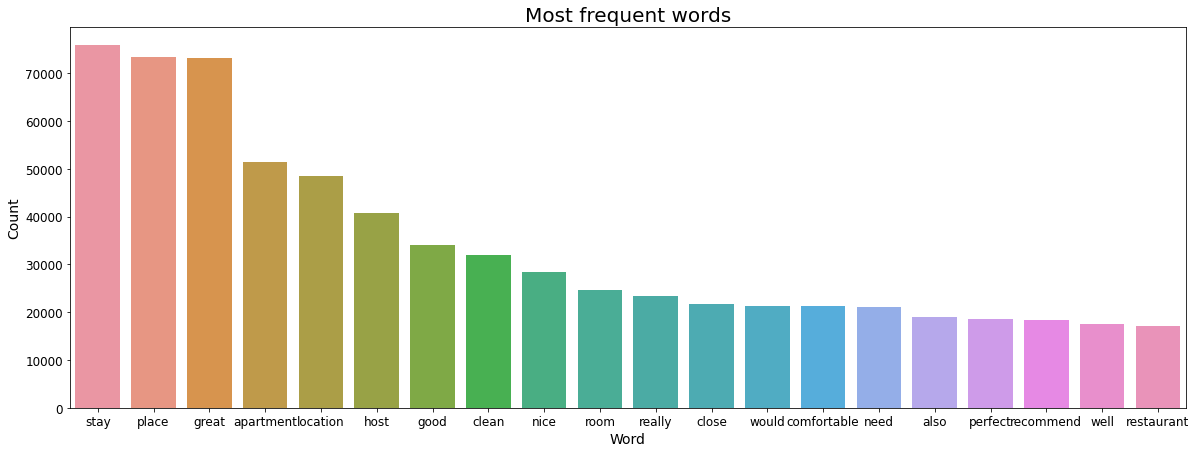

CPU times: user 2min 39s, sys: 499 ms, total: 2min 40s
Wall time: 2min 40s


In [94]:
%%time
data = []
for i in range(len(data_lemmatized)):
    data.append(' '.join(data_lemmatized[i]))

plot_freq_words(freq_words(data_lemmatized), 20)

In [95]:
def stop_word_spacy(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent)) 
        texts_out.append([token.text for token in doc if not token.is_stop])
    return texts_out

In [ ]:
%%time
data_lemmatized_2 = stop_word_spacy(data_lemmatized)

In [96]:
print(data_lemmatized_2[:10])

[['firstly', 'house', 'exactly', 'describe', 'room', 'well_equippe', 'comfortable', 'pillow', 'quilt', 'independent', 'bathroom'], ['term', 'easy', 'find', 'long', 'follow', 'guideline', 'uploaded', 'profile'], ['close', 'kind', 'far', 'away', 'main', 'shopping', 'point', 'place', 'interest'], ['keen', 'help', 'traveller'], ['day', 'book', 'month', 'answer', 'query'], ['arrange', 'apartment', 'great'], ['place', 'feel', 'homely', 'free', 'connection'], ['entire', 'stay', 'help', 'direction', 'maps', 'place', 'tip', 'eat', 'shop', 'area'], ['fortunate', 'meet', 'time', 'place', 'stay', 'holiday'], ['apartment', 'locate', 'convenient', 'area', 'min', 'city']]


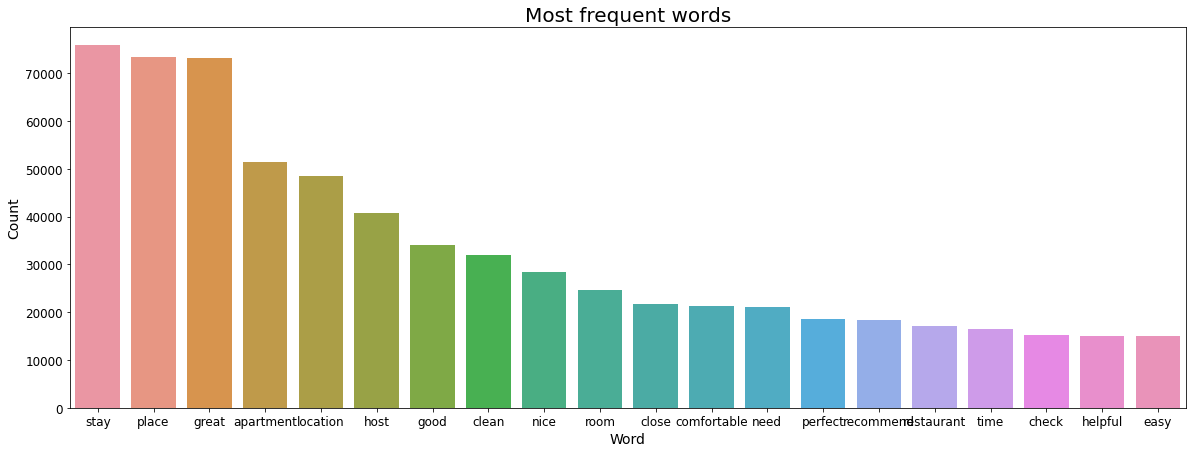

In [97]:
plot_freq_words(freq_words(data_lemmatized_2), 20)

In [ ]:
allWordDist = FreqDist(w.lower() for w in allWords)

In [98]:
with open('data_lemmatized_2.pkl', 'wb') as f:
    pickle.dump(data_lemmatized_2, f)

In [110]:
len(data)

509208

In [111]:
len(data_lemmatized_2)

509208

In [99]:
words_freq = dict()
for doc in data_lemmatized_2:
    for word in doc:
        if word in words_freq:
            words_freq[word] = words_freq[word] + 1
        else:
            words_freq[word] = 1

In [100]:
import operator
dict(sorted(words_freq.items(), key=operator.itemgetter(1),reverse=True))

{'stay': 75785,
 'place': 73274,
 'great': 73194,
 'apartment': 51353,
 'location': 48416,
 'host': 40654,
 'good': 34135,
 'clean': 31970,
 'nice': 28480,
 'room': 24644,
 'close': 21661,
 'comfortable': 21253,
 'need': 21095,
 'perfect': 18482,
 'recommend': 18318,
 'restaurant': 17035,
 'time': 16544,
 'check': 15162,
 'helpful': 15098,
 'easy': 15057,
 'area': 13813,
 'amazing': 12466,
 'thank': 12150,
 'home': 11817,
 'lot': 11226,
 'super': 10979,
 'space': 10723,
 'night': 10668,
 'convenient': 10660,
 'beautiful': 10606,
 'friendly': 10543,
 'love': 10222,
 'bed': 10215,
 'quiet': 9863,
 'day': 9568,
 'walk': 9206,
 'experience': 9192,
 'definitely': 9116,
 'wonderful': 9061,
 'small': 8958,
 'locate': 8570,
 'feel': 8546,
 'enjoy': 8488,
 'neighborhood': 8383,
 'city': 8361,
 'provide': 8329,
 'help': 7927,
 'find': 7883,
 'spacious': 7681,
 'lovely': 7550,
 'communication': 7261,
 'little': 7191,
 'want': 7121,
 'people': 7094,
 'view': 7038,
 'away': 6883,
 'safe': 6859,
 'f

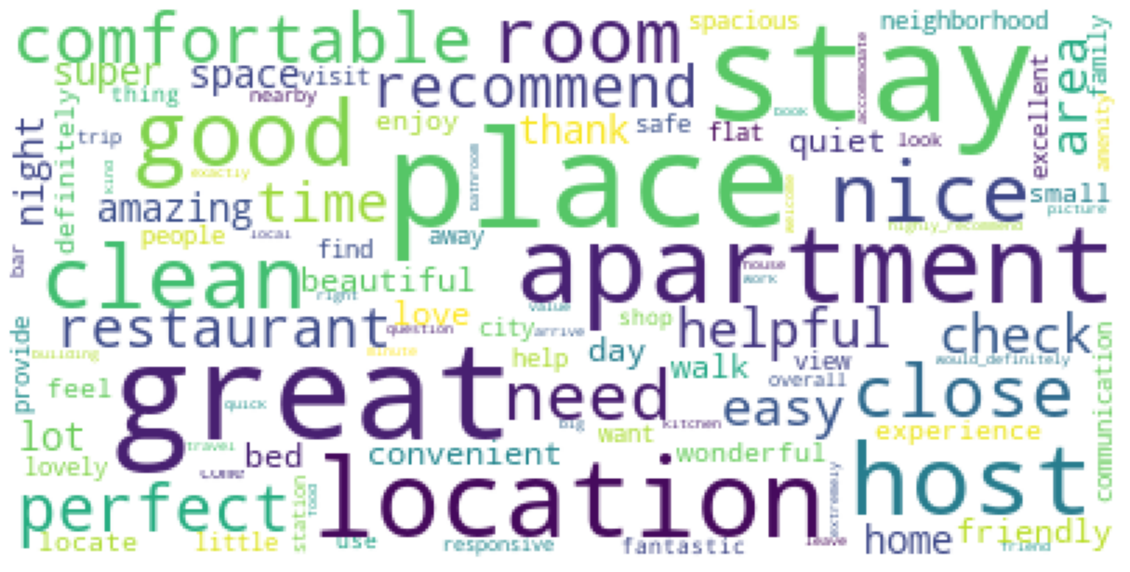

In [101]:
#Word cloud
from wordcloud import WordCloud, ImageColorGenerator

#words = ''
#for doc in data_lemmatized:
    #words = words + ' ' + ' '.join([text for text in doc])
    
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate_from_frequencies(words_freq)
#print(wordcloud)
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()